In [1]:
# Import the required libraries
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold


from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# Import the dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv")

In [3]:
# Print the head
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
# Check the distribution of the target class
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [5]:
# Check for missing value
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [6]:
# Check the shape of the dataset
df.shape

(10000, 14)

In [7]:
# let drop the stab column
df.drop(columns=["stab"], axis=1, inplace=True)

In [8]:
# Pirnt the head
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [9]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [10]:
# Define X and y
X = df.drop(columns = "stabf")
y = df["stabf"]

In [11]:
# Check the columns in X by printing the first five rows
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [12]:
# print five records in y
y.head()

0    unstable
1      stable
2    unstable
3    unstable
4    unstable
Name: stabf, dtype: object

In [13]:
# Check the shape of X and y
print("The shape of X is :", X.shape)
print("The shape of y is :", y.shape)

The shape of X is : (10000, 12)
The shape of y is : (10000,)


In [14]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
# Get the shape of X_train, X_test, y_train, and y_test
print("The shape of X_train is {} and X_test is {}".format(X_train.shape, X_test.shape))
print("The shape of y_train is {} and y_test is {}".format(y_train.shape, y_test.shape))

The shape of X_train is (8000, 12) and X_test is (2000, 12)
The shape of y_train is (8000,) and y_test is (2000,)


In [16]:
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [17]:
# normalizing the training set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_train_df = scaler.fit_transform(X_train)

# Convert the normalized version to a dataframe

normalized_train_df = pd.DataFrame(normalized_train_df, columns = X_train.columns)

In [18]:
normalized_train_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [19]:
# Normalizing the testing dataset
X_test = X_test.reset_index(drop=True)
normalized_test_df = scaler.transform(X_test)

# Convert the normalized test set to a dataframe
normalized_test_df = pd.DataFrame(normalized_test_df, columns = X_test.columns)

In [20]:
normalized_test_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.593951,-0.412733,1.503924,1.116943,0.403423,-1.492971,-0.785033,1.566781,-0.901007,1.167203,-1.507330,1.084726
1,0.202190,0.374416,-0.188800,-0.522268,-0.225967,-1.058483,0.420047,1.028627,-1.625721,-0.395660,1.414651,1.226011
2,-1.079044,-0.313745,-0.884634,0.017080,-0.943122,0.112653,0.801335,0.733004,1.457108,-1.438495,0.651821,-1.682168
3,-0.083120,-1.107327,0.372805,-1.708152,0.753990,-1.637972,0.403805,-0.088036,0.083322,-1.672322,-0.357714,1.055865
4,0.873921,1.438466,0.086662,1.715037,-0.153880,-0.007015,-0.197053,0.472315,0.136549,-1.469731,0.956396,-0.819727


# Building the Model

In [21]:
# Import the relevant classifier models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [22]:
# Instantiate all the models class
rfc = RandomForestClassifier(random_state=1)
extc = ExtraTreesClassifier(random_state=1)
xgb = XGBClassifier(max_depth=3, learning_rate=0.1, random_state=1)
lgbm = LGBMClassifier(random_state=1)

In [23]:
# Train the RandomForestclassifier model
rfc.fit(normalized_train_df, y_train)

# make prediction with the model
y_pred = rfc.predict(normalized_test_df)

In [24]:
# print the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy
print('Accuracy: {}'.format(round(accuracy, 4)))

Accuracy: 0.929


In [29]:
# Train the XGB Classifier model

#Training this model requires label encoding for the target class

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["stabf"] = label_encoder.fit_transform(df["stabf"])

# Define X1 and y1
X1 = df.drop(columns = "stabf")
y1 = df["stabf"]

# split the dataset
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

# normalizing the training and testing set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_train_df1 = scaler.fit_transform(X_train1)

# Convert the normalized version to a dataframe

normalized_train_df1 = pd.DataFrame(normalized_train_df1, columns = X_train1.columns)


X_test1 = X_test1.reset_index(drop=True)
normalized_test_df1 = scaler.transform(X_test1)

# Convert the normalized test set to a dataframe
normalized_test_df1 = pd.DataFrame(normalized_test_df1, columns = X_test1.columns)

# Train the model
xgb.fit(normalized_train_df1, y_train1)

# Make Prediction with the model
y_pred = xgb.predict(normalized_test_df1)

# Evaluate the model accuracy
accuracy = accuracy_score(y_true=y_test1, y_pred=y_pred)
print('Accuracy: {}'.format(round(accuracy, 4)))

Accuracy: 0.9195


In [25]:
# Train the LGBMClassifier 
lgbm.fit(normalized_train_df, y_train)

# make prediction with the model

y_pred2 = lgbm.predict(normalized_test_df)

# Calculate the model accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred2)
print('Accuracy: {}'.format(round(accuracy, 4)))

Accuracy: 0.9395


In [26]:
# Define the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV).

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['sqrt'] 

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}
    

In [30]:
# Define the training model function to be used for RandomiezdCV
def model_training(model, X_train = normalized_train_df, y_train = y_train, X_test = normalized_test_df):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
   
    return classification_report(y_pred, y_test)

In [31]:
# Define the training model function to be used for RandomiezdCV
def model_training1(model, X_train = normalized_train_df1, y_train = y_train1, X_test = normalized_test_df1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
   
    return classification_report(y_pred, y_test1)

In [33]:
from sklearn.model_selection import RandomizedSearchCV
# Define Randomized Search Cross Validation 

RSCV = RandomizedSearchCV(extc, hyperparameter_grid, random_state=1)

In [34]:
# Printing the Classification report of each model
print("Classification Report using RandomForestClassifier \n", model_training(rfc))
print("Classification Report using ExtraTreesClassifier \n", model_training(extc))
print("Classification Report using XGBClassifier \n", model_training1(xgb))
print("Classification Report using LGBMClassifier \n", model_training(lgbm))
print("Classification Report using RandomizedSearchCV \n", model_training(RSCV))

Classification Report using RandomForestClassifier 
               precision    recall  f1-score   support

      stable       0.88      0.92      0.90       680
    unstable       0.96      0.93      0.95      1320

    accuracy                           0.93      2000
   macro avg       0.92      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Classification Report using ExtraTreesClassifier 
               precision    recall  f1-score   support

      stable       0.85      0.94      0.89       644
    unstable       0.97      0.92      0.95      1356

    accuracy                           0.93      2000
   macro avg       0.91      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Classification Report using XGBClassifier 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       655
           1       0.96      0.92      0.94      1345

    accuracy                      

In [35]:
# Create a confusion matrix function for all the model
def main_confusion_matrix(model, X_train = normalized_train_df, X_test=normalized_test_df, y_test = y_test, labels = ['stable', 'unstable']):
    y_pred = model.predict(normalized_test_df)
    cnf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=labels)
    return cnf_mat

In [36]:
def main_confusion_matrix1(model, X_train = normalized_train_df1, X_test=normalized_test_df1, y_test = y_test1, labels = ['0', '1']):
    y_pred = model.predict(normalized_test_df1)
    cnf_mat = confusion_matrix(y_true=y_test1, y_pred=y_pred, labels=labels)
    return cnf_mat

In [37]:
# Printing out confusion matrix of all the models
print("Confusion Matrix using RandomForestClassifier \n", main_confusion_matrix(rfc))
print("Confusion Matrix using ExtraTreesClassifier \n", main_confusion_matrix(extc))
print("Confusion Matrix using XGBClassifier \n", main_confusion_matrix1(xgb))
print("Confusion Matrix using LGBMClassifier \n", main_confusion_matrix(lgbm))
print("Confusion Matrix using RandomizedSearchCV \n", main_confusion_matrix(RSCV))

Confusion Matrix using RandomForestClassifier 
 [[ 625   87]
 [  55 1233]]
Confusion Matrix using ExtraTreesClassifier 
 [[ 606  106]
 [  38 1250]]
Confusion Matrix using XGBClassifier 
 [[0 0]
 [0 0]]
Confusion Matrix using LGBMClassifier 
 [[ 641   71]
 [  50 1238]]
Confusion Matrix using RandomizedSearchCV 
 [[ 587  125]
 [  19 1269]]


# Calculating Cros_val_score for all the models

In [38]:
# Estimating the cross_val_score
from sklearn.model_selection import cross_val_score
def cross_val(model,X_train = normalized_train_df, X_test = normalized_test_df, y_train=y_train ):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    return scores.mean()*100

In [39]:
# Estimating the cross_val_score
from sklearn.model_selection import cross_val_score
def cross_val1(model,X_train = normalized_train_df1, X_test = normalized_test_df1, y_train=y_train1):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    return scores.mean()*100

In [40]:
print("Cross val score of RandomClassifier \n", cross_val(rfc))
print("Cross val score of ExtraTreesClassifier \n", cross_val(extc))
print("Cross val score of XGBClassifier \n", cross_val1(xgb))
print("Cross val score of LGBMClassifier \n", cross_val(lgbm))
print("Cross val score of RandomizedSearchCV \n", cross_val(RSCV))

Cross val score of RandomClassifier 
 91.12309265936217
Cross val score of ExtraTreesClassifier 
 91.46867832800964
Cross val score of XGBClassifier 
 91.3159560444606
Cross val score of LGBMClassifier 
 93.50266330935582
Cross val score of RandomizedSearchCV 
 91.21699578126155


<AxesSubplot:>

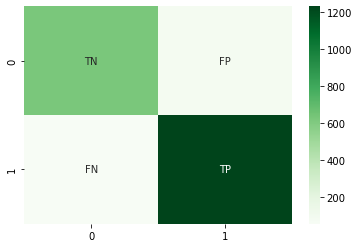

In [45]:
# Creating confusion matrix heatmap for the RandomForestClassifier model
names = ['TN','FP','FN','TP']
names = np.asarray(names).reshape(2,2)
sns.heatmap(main_confusion_matrix(rfc), annot=names, fmt='', cmap='Greens')

# Feature Importance Selection

In [43]:
# Instantiate the model class 
etf= ExtraTreesClassifier() 

# Train the model 
etf.fit(normalized_train_df, y_train) 

# Evalauting  the feature importance 
feature_importance = etf.feature_importances_ 

# Normalizing the individual importances 
normalized_feature_importance = np.std([tree.feature_importances_ for tree in etf.estimators_], axis = 0) 

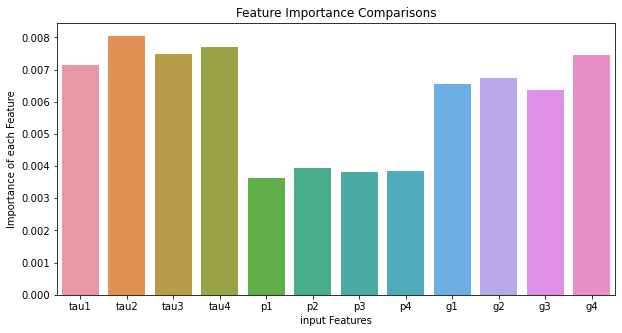

In [50]:
# Create a Bar plot to compare the models 
plt.figure(figsize=(10, 5))
sns.barplot(x=normalized_train_df.columns, y=normalized_feature_importance) 
plt.xlabel('input Features') 
plt.ylabel('Importance of each Feature') 
plt.title('Feature Importance Comparisons') 
plt.show()